DATA ANALYSIS AND PREDICTION OF PRICE WITH THE USE OF LINEAR REGRESSION

INTRODUCTION

The vehicle trade data is a project that includes the classification of various vehicles based on various features like mileage, standard colour, fuel_type, standard model,e.t.c.
The vehicle trade data was analyzed and also the most probable price of each vehicle was predicted by the use of linear regression.
The main focus of this project is to analyze the used vehicles based on their prices from the available data set.

ALL NECESSARY IMPORTS

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
sns.set()

READING AND UNDERSTANDING THE DATA

UNDERSTANDING THE DATA COLUMNS

-public_reference: No actionable information could be gotten from this variable.

-mileage: The average number of miles travelled by a vehicle.

-reg_code: No actionable information could be gotten from this variable.

-standard_colour: The colour of the vehicle at the time of sales. There's 5 in total:
                    ~Grey
                    ~Blue
                    ~Black
                    ~White
                    ~Silver
                    
-standard_make: This refers to the brands of the vehicles. There's a total of 11:
(MINI, Volkswagen, Mercedes-Benz, Vauxhall, Nissan, BMW, Toyota, Audi, Renault, Fiat, Kia)

-standard_model: This refers to the name of the vehicle, i.e the name given by the manufacturer. There are 19 in total:
('Hatch', 'Golf', 'C Class', 'Corsa', 'Qashqai', 'Yaris', 'Polo','Astra', 'A1', 'E Class', 'Clio', 'A Class', '5 Series','1 Series', '500', 'A3', 'Sportage', '3 Series', 'Juke')

-vehicle_condition: This refers to the state of the vehicle, i.e whether it has been used or not. All vehicles in the data set have been USED.

-year_of_registration: This is when the vehicle was first registered.

-price: This refers to how much the vehicle costs.

-body_type: This refers to the shape of the vehicle or how the vehicle looks. They include:
            ~Hatchback
            ~Estate
            ~Saloon
            ~SUV
            ~Coupe
            
-crossover_car_and_van: This refers to whether a vehicle is a crossover type or a van type:
                        ~FALSE
                        
-fuel_type: This refers to what the vehicle runs on or the kind of fuel that propels the vehicle.

-make_model: This is the combination of the make or brand columns of the vehicle and the model columns of the vehicle.

-age: An estimation from the year of registration to the current year.

In [2]:
cars = pd.read_csv("vehicle_trade_data.csv")
cars

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,19000,Hatchback,False,Petrol,MINI - Hatch,5
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel,Volkswagen - Golf,6
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel,Nissan - Qashqai,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017.0,18499,Saloon,False,Diesel,Mercedes-Benz - C Class,5
96265,202010305614799,122000.0,07,Silver,BMW,3 Series,USED,2007.0,1990,Saloon,False,Petrol,BMW - 3 Series,15
96266,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,5000,Hatchback,False,Petrol,Vauxhall - Corsa,7
96267,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,18000,SUV,False,Petrol,Nissan - Juke,3


In [3]:
cars.describe(include=['O'])

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type,make_model
count,96257,96269,96269,96269,96269,96269,96269,96269
unique,58,5,11,19,1,5,2,19
top,17,Black,BMW,Golf,USED,Hatchback,Petrol,Volkswagen - Golf
freq,10218,26479,16585,8975,96269,59227,54805,8975


In [4]:
cars.shape

(96269, 14)

In [5]:
cars.standard_colour.unique()

array(['Grey', 'Blue', 'Black', 'Silver', 'White'], dtype=object)

In [6]:
cars.standard_make.unique()

array(['MINI', 'Volkswagen', 'Mercedes-Benz', 'Vauxhall', 'Nissan',
       'Toyota', 'Audi', 'Renault', 'BMW', 'Fiat', 'Kia'], dtype=object)

In [7]:
cars.standard_model.unique()

array(['Hatch', 'Golf', 'C Class', 'Corsa', 'Qashqai', 'Yaris', 'Polo',
       'Astra', 'A1', 'E Class', 'Clio', 'A Class', '5 Series',
       '1 Series', '500', 'A3', 'Sportage', '3 Series', 'Juke'],
      dtype=object)

In [8]:
cars.body_type.unique()

array(['Hatchback', 'Estate', 'Saloon', 'SUV', 'Coupe'], dtype=object)

In [9]:
cars.fuel_type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [10]:
cars.make_model.unique()

array(['MINI - Hatch', 'Volkswagen - Golf', 'Mercedes-Benz - C Class',
       'Vauxhall - Corsa', 'Nissan - Qashqai', 'Toyota - Yaris',
       'Volkswagen - Polo', 'Vauxhall - Astra', 'Audi - A1',
       'Mercedes-Benz - E Class', 'Renault - Clio',
       'Mercedes-Benz - A Class', 'BMW - 5 Series', 'BMW - 1 Series',
       'Fiat - 500', 'Audi - A3', 'Kia - Sportage', 'BMW - 3 Series',
       'Nissan - Juke'], dtype=object)

In [11]:
cars.age.unique()

array([ 5,  6, 10,  4,  3,  8, 13, 11,  2, 12,  7, 14,  9, 20, 15, 18, 16,
       19, 24, 17, 28, 27, 21, 22, 25, 23, 26, 32, 36, 39, 33, 29, 30, 34,
       31, 52, 60, 59], dtype=int64)

In [12]:
cars.year_of_registration.unique()

array([2017., 2016., 2012., 2018., 2019., 2014., 2009., 2011., 2020.,
       2010., 2015., 2008., 2013., 2002., 2007., 2004., 2006., 2003.,
       1998., 2005., 1994., 1995., 2001., 2000., 1997., 1999., 1996.,
       1990., 1986., 1983., 1989., 1993., 1992., 1988., 1991., 1970.,
       1962., 1963.])

In [13]:
count_colour = cars['standard_colour']=="Grey"
count_colour.sum()

16986

INFERENCE:

    QUANTITATIVE DATA

mileage has a total of 96247 non null data enteries out of a total of 96269 data entries which goes to show that some values are missing. The metrics include:
       -Average mileage = 42964.06
       -Maximum mileage = 999999.0
       -Standard deviation = 34051.70
       
Mileage has irregularities which would have to be looked into.

Year of Registration has 96269 non null entries, which implies that there are no missinng values. Metrics are as follows:
    -Average Year = 2015
    -Maximum Year = 2020
    -Standard deviation =3.7
    
Price has a total of 96269 non null data entries which implies that there are no missing values. Metrics include:
    -Average Price = 12266.08
    -Maximum Price = 158500.0
    -Standard deviation = 7414.82
    
Age has 96269 entries in total which means that there are no missing values. Metrics include:
    -Average age = 6.90
    -Maximum age = 60.0
    -Standard deviation = 3.7
    
Year of registration and Age has been shown to have the same standard deviation which goes to show a possibility that the one is an estimation from the other.

In [14]:
cars.describe()

,public_reference,mileage,year_of_registration,price,age
count,9.626900e+04,96247.000000,96269.000000,96269.000000,96269.000000
mean,2.020082e+14,42964.067150,2015.096075,12266.081615,6.903925
std,1.194558e+10,34051.708175,3.766205,7414.823331,3.766205
min,2.014120e+14,0.000000,1962.000000,200.000000,2.000000
25%,2.020091e+14,17000.000000,2013.000000,6999.000000,4.000000
50%,2.020100e+14,34352.000000,2016.000000,11030.000000,6.000000
75%,2.020102e+14,62000.000000,2018.000000,15999.000000,9.000000
max,2.020110e+14,999999.000000,2020.000000,158500.000000,60.000000


In [15]:
sum_most= (cars['standard_colour']=='Black').sum()
(sum_most/len(cars.standard_colour))*100

27.5052197488288

In [16]:
sum_most = (cars['standard_make']=='BMW').sum()
(sum_most/len(cars.standard_make))*100

17.227768025013244

In [17]:
sum_most = (cars['standard_model']== 'Golf').sum()
(sum_most/len(cars.standard_model))*100

9.322834972836532

In [18]:
sum_most = (cars['body_type']== 'Hatchback').sum()
(sum_most/len(cars.body_type))*100

61.52240077283445

In [19]:
sum_most = (cars['fuel_type']== 'Petrol').sum()
(sum_most/len(cars.fuel_type))*100

56.92902180348815

INFERENCE:

    QUALITATIVE DATA

-standard color, metrics include:
    most occurent = Black
    percentage = 27.5%
    
-standard make, metrics include:
    most occurent = BMW
    percentage = 17.2%
    
-standard model, metrics include:
    most occurent = Golf
    percentage = 9.3%
    
-vehicle condition contains used only

-body_type, metrics include:
    most occurent = Hatchback
    percentage = 61.5%
    
-fuel_type, metrics include:
    most occurent = Petrol
    percentage = 56.9%

DATA VISUALIZATION

VISUALISING QUALITATIVE DATA
-standard_color
-standard_make
-standard_model
-fuel_type
-body_type

<function matplotlib.pyplot.show(close=None, block=None)>

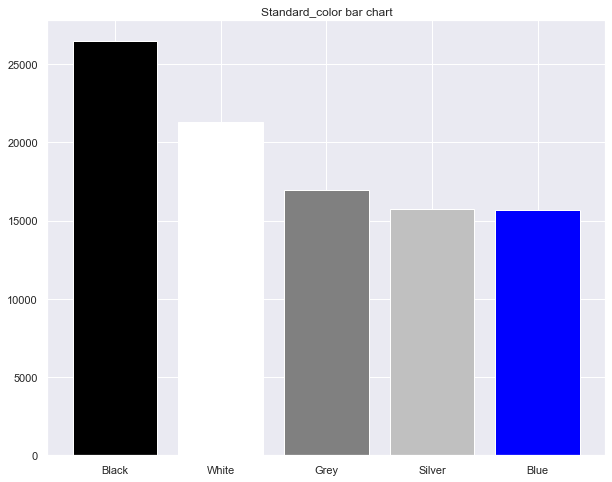

In [20]:
plt.figure(figsize= (10,8))

plt.title('Standard_color bar chart')
values_of_standard_colour = cars.standard_colour.value_counts()
plt.bar(values_of_standard_colour.index, values_of_standard_colour, color = ['black','w','grey','silver','blue'])

plt.show

<BarContainer object of 5 artists>

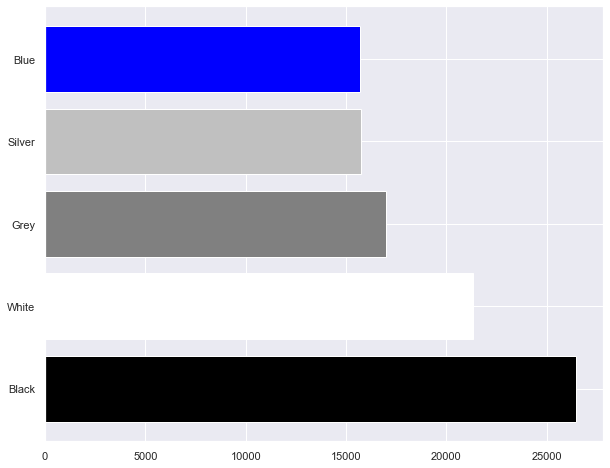

In [21]:
plt.figure(figsize= (10,8))

plt.barh(values_of_standard_colour.index, values_of_standard_colour, color = ['black','w','grey','silver','blue'])

INFERENCE:
Black cars have the highest number of standard color compared to Blue which shows the cars with the lowest number of standard color.
Standard color includes the color of cars available for sales which are; Black, White, Grey, Silver, Blue

<BarContainer object of 11 artists>

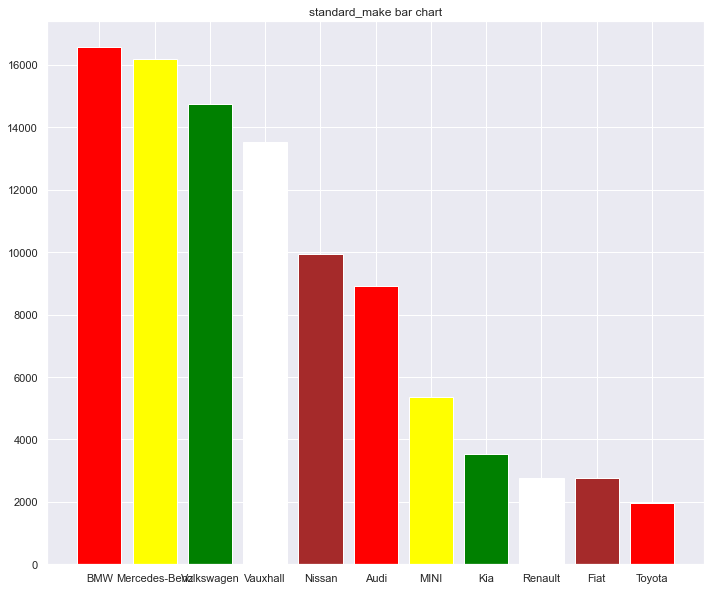

In [22]:
plt.figure(figsize=(40,10))

plt.subplot(1,3,1)
plt.title('standard_make bar chart')
values_of_standard_make = cars.standard_make.value_counts() 
plt.bar(values_of_standard_make.index, values_of_standard_make, color = ['red', 'yellow', 'green', 'w', 'brown'])

<BarContainer object of 11 artists>

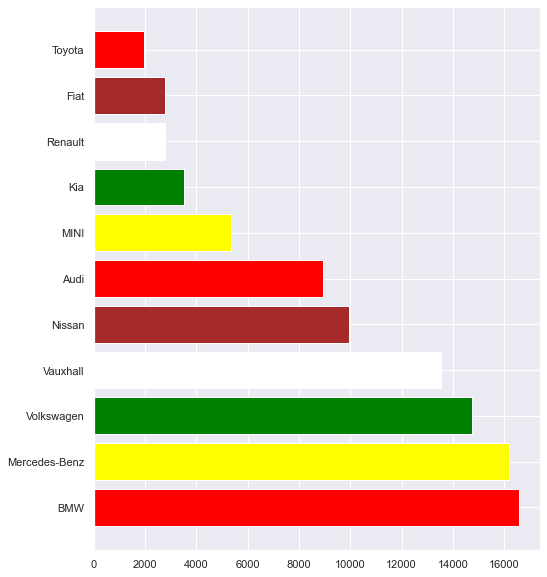

In [23]:
plt.figure(figsize= (8,10))

plt.barh(values_of_standard_make.index, values_of_standard_make, color = ['red', 'yellow', 'green', 'w', 'brown'])

INFERENCE:

BMW is the most preferred car brand under the standard make while toyota is the least preferred car brand under the standard make. The brands under the standard_make include:
BMW, Mercedes-Benz, Volkswagen, Vauxhall, Nissan, Audi, MINI, Kia, Renault, Fiat, Toyota

<BarContainer object of 19 artists>

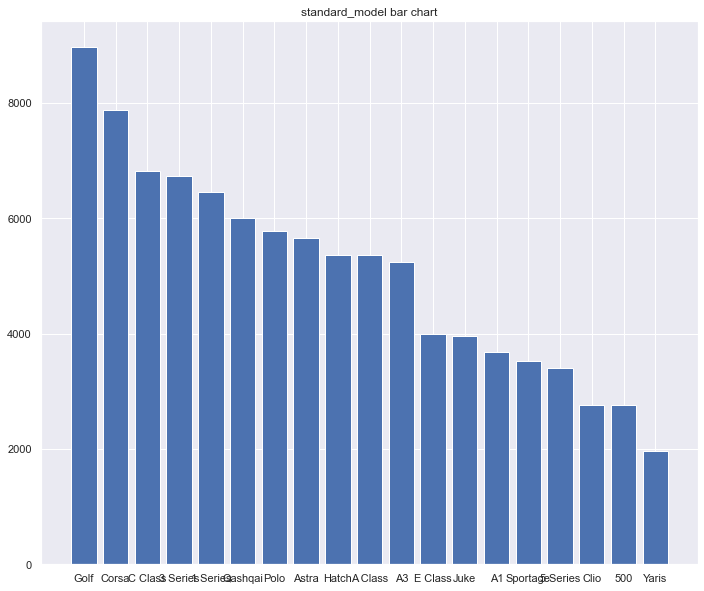

In [24]:
plt.figure(figsize=(40,10))

plt.subplot(1,3,1)
plt.title('standard_model bar chart')
values_of_standard_model = cars.standard_model.value_counts() 
plt.bar(values_of_standard_model.index, values_of_standard_model)

<BarContainer object of 19 artists>

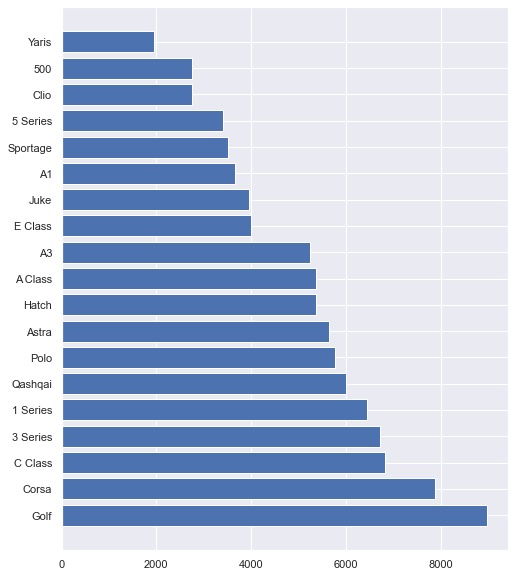

In [25]:
plt.figure(figsize= (8,10))

plt.barh(values_of_standard_model.index, values_of_standard_model)

INFERENCE:

Standard model includes the brands or models of the cars on sale. The most preferred model includes Golf while the least preferred includes Yaris.

<BarContainer object of 2 artists>

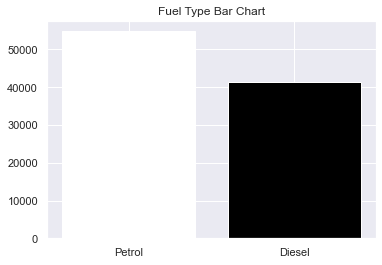

In [26]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,2)
plt.title('Fuel Type Bar Chart')
values_of_fuel_type = cars.fuel_type.value_counts() 
plt.bar(values_of_fuel_type.index, values_of_fuel_type,  color = ['w', 'black'])

<BarContainer object of 2 artists>

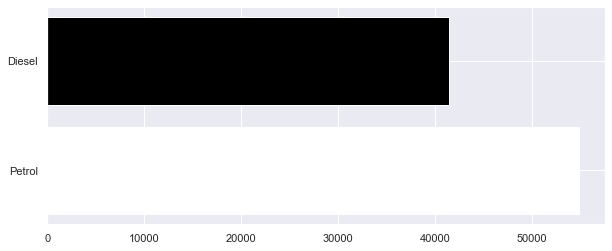

In [27]:
plt.figure(figsize= (10, 4))

plt.barh(values_of_fuel_type.index, values_of_fuel_type, color =  ['w', 'black'])

INFERENCE:

Fuel_type involves the kind of fuel used to fuel cars and it includes; Petrol and Diesel. Petrol fueled cars are more than Diesel fueled cars.

<BarContainer object of 5 artists>

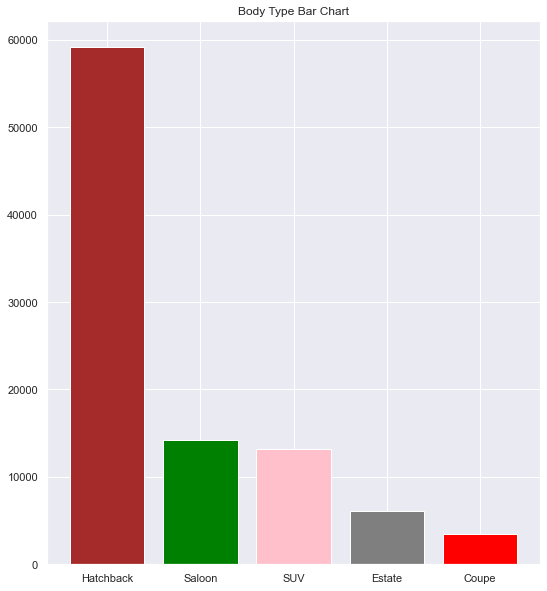

In [28]:
plt.figure(figsize= (30, 10))

plt.subplot(1,3,3)
plt.title('Body Type Bar Chart')
values_of_body_type = cars.body_type.value_counts() 
plt.bar(values_of_body_type.index, values_of_body_type, color = ['brown','green','pink','tab:gray','red'])



<BarContainer object of 5 artists>

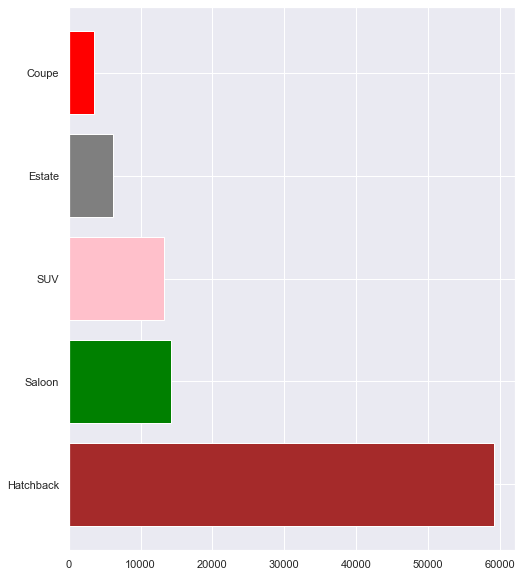

In [29]:
plt.figure(figsize= (8,10))

plt.barh(values_of_body_type.index, values_of_body_type, color = ['brown','green','pink','tab:gray','red'])

INFERENCE:

Body_type refers to the shape of the cars and they include; Hatchback, Saloon, SUV, Estate, Coupe. The top body type is the Hatchback.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 720x1440 with 0 Axes>

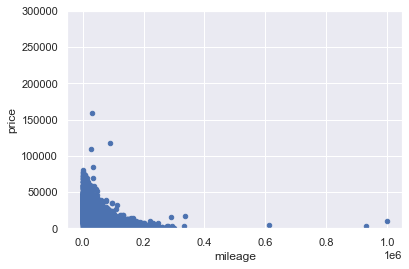

In [30]:
# Scatter Plot Mileage/Price

plt.figure(figsize=(10,20))
value = 'mileage'
data = pd.concat([cars['price'], cars[value]], axis=1)
data.plot.scatter(x=value, y='price', ylim=(0,300000));

# plt.tight_layout()

INFERENCE: Mileage is referred to as the number of miles travelled or covered by a vehicle. The scatter plot goes to show that mileage and price have a significant positive correlation, i.e they are positively correlated.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


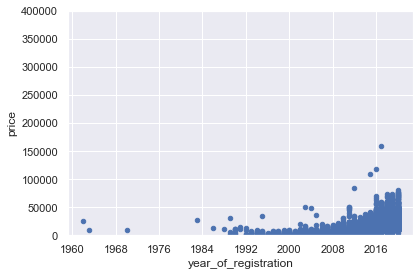

In [31]:
# Scatter plot Year Of Registration / Price

value = 'year_of_registration'
graph = pd.concat([cars['price'], cars[value]], axis=1)
graph.plot.scatter(x=value, y='price', ylim=(0,400000))
plt.xticks([x for x in range(1960, 2023, 8)])

plt.tight_layout()

INFERENCE: Year of registration doesn't show any significant correlation with price. It seems to have a significant negative correlation with price, i.e price and year of registration are negatively correlated.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


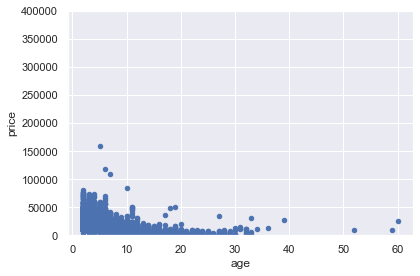

In [32]:
# Scatter plot Age / Price

value = 'age'
graph = pd.concat([cars['price'], cars[value]], axis=1)
graph.plot.scatter(x=value, y='price', ylim=(0,400000))

plt.tight_layout()

INFERENCE: Age refers to the time frame from when a vehicle was bought till the current year. The scatter diagram shows that it has a positive correlation with price.

Price is referred to as how much the vehicle costs.

CLEANING THE DATA

In [33]:
clear_cars = cars[~cars.mileage.isnull()]
clear_cars

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,19000,Hatchback,False,Petrol,MINI - Hatch,5
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel,Volkswagen - Golf,6
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel,Nissan - Qashqai,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017.0,18499,Saloon,False,Diesel,Mercedes-Benz - C Class,5
96265,202010305614799,122000.0,07,Silver,BMW,3 Series,USED,2007.0,1990,Saloon,False,Petrol,BMW - 3 Series,15
96266,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,5000,Hatchback,False,Petrol,Vauxhall - Corsa,7
96267,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,18000,SUV,False,Petrol,Nissan - Juke,3


In [34]:
clear_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96247 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96247 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96235 non-null  object 
 3   standard_colour        96247 non-null  object 
 4   standard_make          96247 non-null  object 
 5   standard_model         96247 non-null  object 
 6   vehicle_condition      96247 non-null  object 
 7   year_of_registration   96247 non-null  float64
 8   price                  96247 non-null  int64  
 9   body_type              96247 non-null  object 
 10  crossover_car_and_van  96247 non-null  bool   
 11  fuel_type              96247 non-null  object 
 12  make_model             96247 non-null  object 
 13  age                    96247 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(8)
memory usa

In [35]:
clear= clear_cars.drop(columns=['public_reference', 'reg_code', 'crossover_car_and_van', 'vehicle_condition'])
clear

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,fuel_type,make_model,age
0,31534.0,Grey,MINI,Hatch,2017.0,19000,Hatchback,Petrol,MINI - Hatch,5
1,52023.0,Blue,Volkswagen,Golf,2016.0,13500,Estate,Diesel,Volkswagen - Golf,6
2,29500.0,Grey,Mercedes-Benz,C Class,2012.0,9495,Saloon,Petrol,Mercedes-Benz - C Class,10
3,35300.0,Grey,Vauxhall,Corsa,2018.0,7293,Hatchback,Petrol,Vauxhall - Corsa,4
4,47299.0,Black,Nissan,Qashqai,2016.0,11500,SUV,Diesel,Nissan - Qashqai,6
...,...,...,...,...,...,...,...,...,...,...
96264,28225.0,White,Mercedes-Benz,C Class,2017.0,18499,Saloon,Diesel,Mercedes-Benz - C Class,5
96265,122000.0,Silver,BMW,3 Series,2007.0,1990,Saloon,Petrol,BMW - 3 Series,15
96266,45000.0,Silver,Vauxhall,Corsa,2015.0,5000,Hatchback,Petrol,Vauxhall - Corsa,7
96267,4075.0,Grey,Nissan,Juke,2019.0,18000,SUV,Petrol,Nissan - Juke,3


In [36]:
clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96247 entries, 0 to 96268
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mileage               96247 non-null  float64
 1   standard_colour       96247 non-null  object 
 2   standard_make         96247 non-null  object 
 3   standard_model        96247 non-null  object 
 4   year_of_registration  96247 non-null  float64
 5   price                 96247 non-null  int64  
 6   body_type             96247 non-null  object 
 7   fuel_type             96247 non-null  object 
 8   make_model            96247 non-null  object 
 9   age                   96247 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 8.1+ MB


INFERENCE: 
    The public_reference, reg_code, crossover_car_and_van, vehicle_condition columns were dropped because when compared to price, they don't provide significant correlations.

HANDLING OF OUTLIERS

In [37]:
#Removing the outliers (IQR Method)

def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return filtered_data

In [38]:
outlier_free_mileage = removeOutliers(clear, 'mileage')
outlier_free_p =   removeOutliers(outlier_free_mileage, 'year_of_registration')
outlier_free_set =    removeOutliers(outlier_free_p, "price")
outlier_free_age = removeOutliers(outlier_free_set, "age")
outlier_free_data = outlier_free_age


IQR value for column mileage is: 45000.0
IQR value for column year_of_registration is: 5.0
IQR value for column price is: 8799.0
IQR value for column age is: 3.0


INFERENCE:
The values for IQR for each column is as listed below:
-IQR value for column mileage is: 45000.0
-IQR value for column year_of_registration is: 5.0
-IQR value for column price is: 8799.0
-IQR value for column age is: 3.0

In [39]:
for col in outlier_free_data.columns.tolist():          
        print('{} column missing values: {}'.format(col, outlier_free_data[col].isnull().sum()))

mileage column missing values: 0
standard_colour column missing values: 0
standard_make column missing values: 0
standard_model column missing values: 0
year_of_registration column missing values: 0
price column missing values: 0
body_type column missing values: 0
fuel_type column missing values: 0
make_model column missing values: 0
age column missing values: 0


In [40]:
outlier_free_data.shape

(84072, 10)

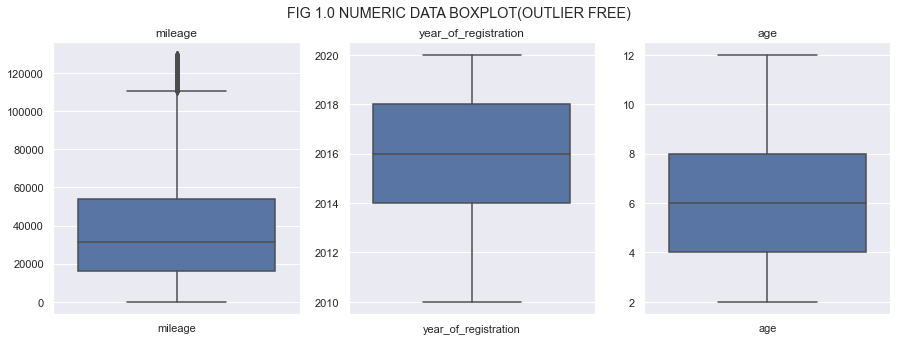

In [41]:
# Further checks for outliers in numeric columns

numeric_cols = ['mileage', 'year_of_registration', 'age']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for index, column in enumerate(numeric_cols):
  
  numeric_df = outlier_free_data[[column]]
  sns.boxplot(ax=axes[index], data=numeric_df)
  axes[index].set_title(column)
  fig.suptitle("FIG 1.0 NUMERIC DATA BOXPLOT(OUTLIER FREE)")

In [42]:
clear_off = outlier_free_data
clear_off.head()
#len(clear_off.mileage)

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,fuel_type,make_model,age
0,31534.0,Grey,MINI,Hatch,2017.0,19000,Hatchback,Petrol,MINI - Hatch,5
1,52023.0,Blue,Volkswagen,Golf,2016.0,13500,Estate,Diesel,Volkswagen - Golf,6
2,29500.0,Grey,Mercedes-Benz,C Class,2012.0,9495,Saloon,Petrol,Mercedes-Benz - C Class,10
3,35300.0,Grey,Vauxhall,Corsa,2018.0,7293,Hatchback,Petrol,Vauxhall - Corsa,4
4,47299.0,Black,Nissan,Qashqai,2016.0,11500,SUV,Diesel,Nissan - Qashqai,6


LIST OF SIGNIFICANT VARIABLES AFTER VISUAL ANALYSIS :
-standard_colour
-standard_make
-standard_model
-year_of_registration
-price
-body_type
-fuel_type
-mileage
-age

In [43]:
carss=cars[['price','mileage', 'age', 'standard_colour', 'standard_make', 'standard_model', 'year_of_registration', 'body_type', 'fuel_type']]
carss.head()

,price,mileage,age,standard_colour,standard_make,standard_model,year_of_registration,body_type,fuel_type
0,19000,31534.0,5,Grey,MINI,Hatch,2017.0,Hatchback,Petrol
1,13500,52023.0,6,Blue,Volkswagen,Golf,2016.0,Estate,Diesel
2,9495,29500.0,10,Grey,Mercedes-Benz,C Class,2012.0,Saloon,Petrol
3,7293,35300.0,4,Grey,Vauxhall,Corsa,2018.0,Hatchback,Petrol
4,11500,47299.0,6,Black,Nissan,Qashqai,2016.0,SUV,Diesel


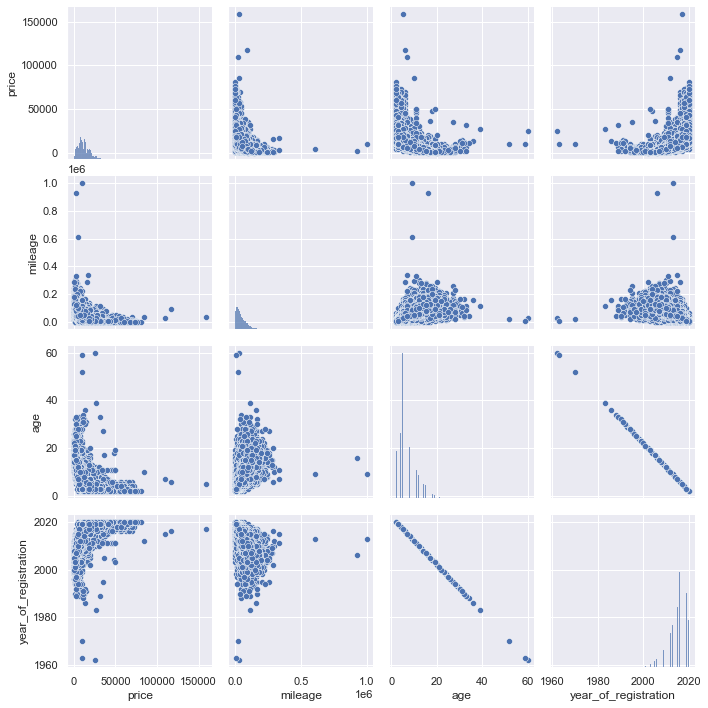

In [44]:
sns.pairplot(carss)
plt.show()

MODEL:
TRAIN-TEST SPLIT AND FEATURE SCALING

In [45]:
lm = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

df = preprocessing.LabelEncoder()

In [46]:
clear_off['standard_colour'] = df.fit_transform(clear_off['standard_colour'])
clear_off['standard_make'] = df.fit_transform(clear_off['standard_make'])
clear_off['standard_model'] = df.fit_transform(clear_off['standard_model'])
clear_off['body_type'] = df.fit_transform(clear_off['body_type'])
clear_off['fuel_type'] = df.fit_transform(clear_off['fuel_type'])
clear_off['make_model'] = df.fit_transform(clear_off['make_model'])



In [47]:
clear_off.head()

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,fuel_type,make_model,age
0,31534.0,2,4,13,2017.0,19000,2,1,7,5
1,52023.0,1,10,12,2016.0,13500,1,0,17,6
2,29500.0,2,5,8,2012.0,9495,4,1,9,10
3,35300.0,2,9,10,2018.0,7293,2,1,16,4
4,47299.0,0,6,16,2016.0,11500,3,0,12,6


In [48]:
clear_off.describe()

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,fuel_type,make_model,age
count,84072.000000,84072.000000,84072.000000,84072.000000,84072.000000,84072.000000,84072.000000,84072.000000,84072.000000,84072.000000
mean,37679.036433,1.914775,5.165120,8.868149,2015.915323,12634.307808,2.311685,0.558557,9.458595,6.084677
std,27513.025114,1.536046,3.456518,5.261452,2.573436,5887.827095,0.885363,0.496562,5.739188,2.573436
min,0.000000,0.000000,0.000000,0.000000,2010.000000,795.000000,0.000000,0.000000,0.000000,2.000000
25%,16224.500000,0.000000,1.000000,4.000000,2014.000000,8295.000000,2.000000,0.000000,4.000000,4.000000
50%,31513.500000,2.000000,5.000000,9.000000,2016.000000,11800.000000,2.000000,1.000000,9.000000,6.000000
75%,54000.000000,3.000000,9.000000,13.000000,2018.000000,16200.000000,3.000000,1.000000,15.000000,8.000000
max,129463.000000,4.000000,10.000000,18.000000,2020.000000,29495.000000,4.000000,1.000000,18.000000,12.000000


In [49]:
x = clear_off.loc[:, clear.columns != "price"]
y = clear_off.price

In [50]:
x.head(11)

,mileage,standard_colour,standard_make,standard_model,year_of_registration,body_type,fuel_type,make_model,age
0,31534.0,2,4,13,2017.0,2,1,7,5
1,52023.0,1,10,12,2016.0,1,0,17,6
2,29500.0,2,5,8,2012.0,4,1,9,10
3,35300.0,2,9,10,2018.0,2,1,16,4
4,47299.0,0,6,16,2016.0,3,0,12,6
5,7990.0,0,8,18,2019.0,2,1,14,3
6,17020.0,2,9,10,2017.0,2,1,16,5
7,35000.0,0,10,12,2014.0,2,0,17,8
9,64785.0,3,10,15,2011.0,2,0,18,11
10,117420.0,3,9,7,2011.0,1,0,15,11


In [51]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.4, train_size = 0.6, random_state = 20) 

In [52]:
lm.fit(x_train, y_train)
q_predt = lm.predict(x_train)
q_predt

array([13251.87221866,  8750.23242114,  3349.25380154, ...,
       14732.66694049, 10679.4310265 , 19345.43348968])

In [53]:
q_preds = lm.predict(x_test)

In [54]:
lm.predict([[31534.0,2, 4,13,2017.0,2,1,7,5]])

array([13581.71509146])

In [55]:
lm.coef_

array([-5.01999473e-02, -4.84558117e+01,  1.29374840e+02, -3.02236122e+01,
        6.19505531e+02,  4.28293684e+02, -2.24769784e+03, -2.84351644e+02,
       -6.19505531e+02])

In [56]:
lm.intercept_

-1227926.5167114558

Text(0.5, 0, 'Errors')

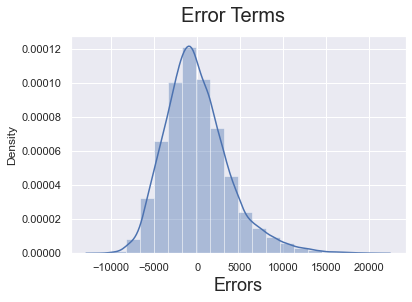

In [57]:
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - q_predt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)   

INFERENCE:
    The error terms look to be normally and approximately distributed, so the assumption on the linear modeling seeems to be fulfilled.

EVALUATION OF TEST VIA COMPARISON OF y_pred and y_test

In [58]:
y_pred = lm.predict(x_test)
r2_score(y_test, y_pred)

0.5876362196209213

Text(0, 0.5, 'y_pred')

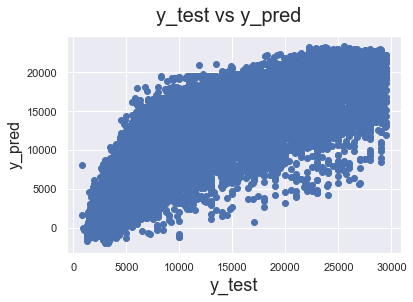

In [59]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

INFERENCE:
    Approximately 59% of the data set fits the linear regression model.